# **IRIS Data Classification Problem**

The IRIS dataset is a classic dataset in the field of machine learning and statistics. It is widely used for classification problems and is often one of the first datasets used for learning and practicing machine learning techniques.

### **Description of the IRIS Dataset**

The IRIS dataset contains 150 samples of iris flowers, each described by four features:
1. **Sepal Length (in cm)**
2. **Sepal Width (in cm)**
3. **Petal Length (in cm)**
4. **Petal Width (in cm)**

Each sample in the dataset belongs to one of three species of iris flowers:
- **Iris Setosa**
- **Iris Versicolor**
- **Iris Virginica**

### **Problem Definition**

The main problem associated with the IRIS dataset is a classification problem. The goal is to use the four features (sepal length, sepal width, petal length, and petal width) to classify each sample into one of the three species of iris flowers.

## Algorithms used
The Iris dataset is a commonly used dataset for educational and practice purposes. We will delve into the following classification algorithms:

1. **Logistic Regression:** Logistic regression is a versatile algorithm used for binary and multiclass classification. It models the probability of an instance belonging to a particular class.

2. **Decision Tree:** Decision trees are tree-like structures that help make decisions or predictions by splitting data into subsets based on certain criteria. They are widely used for classification tasks.

3. **Random Forest Classifier:** The Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and reduce overfitting.

4. **Support Vector Machine (SVM):** SVM is a powerful algorithm for binary and multiclass classification. It finds a hyperplane that best separates data into distinct classes.

5. **K-Nearest Neighbors (K-NN):** K-NN is a simple yet effective classification algorithm. It classifies data points based on the majority class of their nearest neighbors.

6. **Naive Bayes:** The Naive Bayes classifier is based on Bayes' theorem and is particularly effective for text classification. It assumes that features are independent, hence the "naive" designation.

# Steps to solve the problem

## Data Loading and Exploration

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/PavankumarPandya14/CODSOFT/main/IRIS-CLASSIFICATION/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
df.shape

(150, 5)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
df.duplicated().sum()

3

## Data Preprocessing

In [58]:
df.drop_duplicates(inplace=True)
df.isna().sum(), df.shape

(sepal_length    0
 sepal_width     0
 petal_length    0
 petal_width     0
 species         0
 dtype: int64,
 (147, 5))

## Data Visualization

In [59]:
df['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

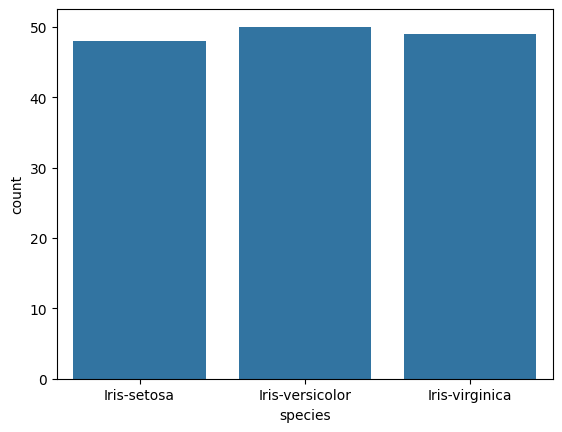

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='species', data=df)
plt.show()

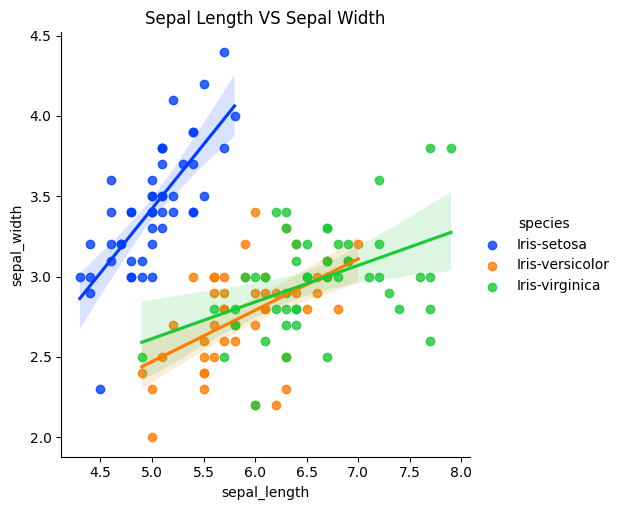

In [61]:
sns.lmplot(
    x="sepal_length",
    y="sepal_width",
    hue="species",
    palette="bright",
    data=df
)

plt.title("Sepal Length VS Sepal Width")
plt.show()

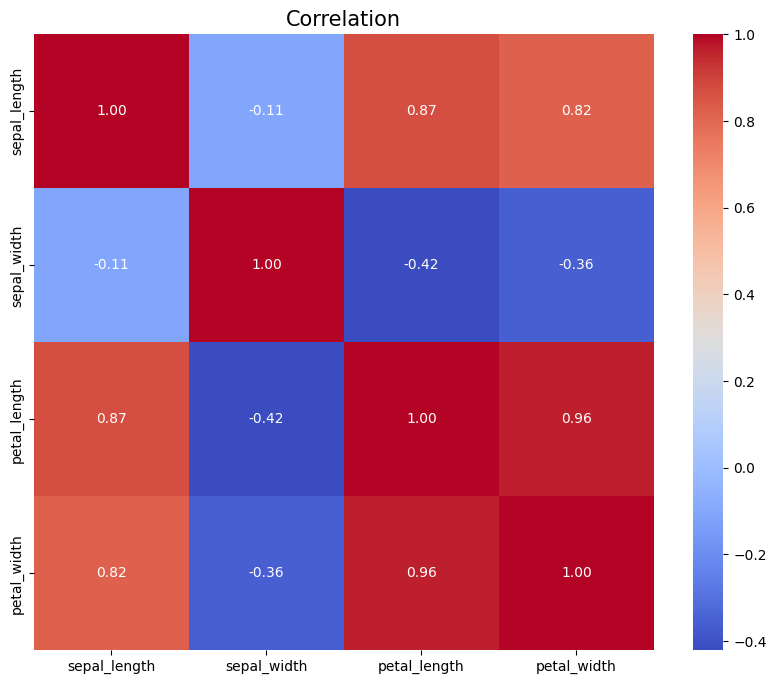

In [62]:
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(df.drop(columns = 'species', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation', fontsize=15)
plt.show()

In [63]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

## Splitting the Data

In [64]:
X = df.drop(columns='species')
y = df['species']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 4), (30, 4), (117,), (30,))

## Model Selection, Training and Evaluation

In [66]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize classifiers for each algorithm
logistic_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
naive_bayes = GaussianNB()

# Define a list of classifiers for iteration
classifiers = [
    ("Logistic Regression", logistic_reg),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("Support Vector Machine", svm_classifier),
    ("K-Nearest Neighbors", knn_classifier),
    ("Naive Bayesian", naive_bayes)
]

# Iterate through classifiers, fit, predict, and evaluate
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Algorithm: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("--------------------------------------------------")


Algorithm: Logistic Regression
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

--------------------------------------------------
Algorithm: Decision Tree
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

--------------------------------------------------
Al

## Hyperparameter Tuning best model

In [67]:
param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03]
}

# Perform Grid Search CV
grid_search_nb = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_nb.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search_nb.best_params_
best_estimator = grid_search_nb.best_estimator_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [68]:
# Print the best parameters
print(f"Best parameters: {best_params}")

# Predict with the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

Best parameters: {'var_smoothing': 1e-09}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



## Saving the model

In [69]:
from joblib import load, dump
dump(grid_search_nb, 'model.joblib')

['model.joblib']

## Loading the model

In [70]:
grid_search_nb = load('model.joblib')

# Making predictions

In [75]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [76]:
output_species = grid_search_nb.predict([[5.1,3.5,1.4,0.2]])
if output_species == 0:
  print('Iris-setosa')
elif output_species == 1:
  print('Iris-vesticolor')
else:
  print('Iris-virginica')

Iris-setosa


# Conclusion
The Iris dataset is a multi-class classification problem, where the goal is to classify flowers into three species based on four features. The techniques learned from this can be applied to many real-world classification problems, such as:

- **Medical Diagnosis:** Classifying patients based on medical test results to diagnose diseases.
- **Spam Detection:** Classifying emails as spam or not spam based on their content.
- **Customer Segmentation:** Classifying customers into different segments based on their behavior and characteristics.

and many more.

### **Author**
Pavankumar Pandya